# Astroquery

Astroquery is a set of tools for querying astronomical web forms and databases and is built by the Astropy team. It makes querying astronomical databases very simple and only a few lines of code away. In this module we shall only look at the tools for obtaining the data that we need to process. We won't be deriving any results.  

In [1]:
import numpy as np
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy.wcs import WCS
from astroquery.vizier import Vizier

## 1. Vizier

[Vizier](https://vizier.u-strasbg.fr/viz-bin/VizieR) is a site built by University of Strasbourg and it provides the most complete library of published **astronomical catalogues** --tables and associated data-- with verified and enriched data, accessible via multiple interfaces. 

In [2]:
catalog_list = Vizier.find_catalogs('Kang W51')
print({k:v.description for k,v in catalog_list.items()})

{'J/ApJ/684/1143': 'BHB candidates in the Milky Way (Xue+, 2008)', 'J/ApJ/736/87': 'Abundances in G-type stars with exoplanets (Kang+, 2011)', 'J/ApJ/738/79': "SDSS-DR8 BHB stars in the Milky Way's halo (Xue+, 2011)", 'J/ApJ/760/12': 'LIGO/Virgo gravitational-wave (GW) bursts with GRBs (Abadie+, 2012)', 'J/ApJ/785/119': 'Gravitational waves from known pulsars (Aasi+, 2014)', 'J/ApJ/813/39': 'LIGO gravitational-wave (GW) searches from SNRs (Aasi+, 2015)', 'J/ApJ/839/12': 'Gravitational waves search from known PSR with LIGO (Abbott+, 2017)', 'J/ApJ/859/4': 'First-look analysis of {rho} Oph-A at 850um (Kwon+, 2018)', 'J/ApJ/879/10': '2015-2017 LIGO obs. analysis for 221 pulsars (Abbott+, 2019)', 'J/ApJ/886/75': 'Search for GW signals associated with GRBs (Abbott+, 2019)', 'J/ApJ/886/93': 'SAMP. III. Opt. LCs and spectra of two AGNs (Rakshit+, 2019)', 'J/ApJS/165/360': 'SiO maser emission toward 10 late-type stars (Kang+, 2006)', 'J/ApJS/191/232': 'CO survey of W51 molecular cloud (Bieging

In [3]:
catalogs = Vizier.get_catalogs(catalog_list.keys())
print(catalogs) #print list of catalogs

TableList with 65 tables:
	'0:J/ApJ/684/1143/table1' with 15 column(s) and 50 row(s) 
	'1:J/ApJ/684/1143/table2' with 17 column(s) and 50 row(s) 
	'2:J/ApJ/736/87/table1' with 20 column(s) and 50 row(s) 
	'3:J/ApJ/736/87/table2' with 6 column(s) and 50 row(s) 
	'4:J/ApJ/738/79/table1' with 19 column(s) and 50 row(s) 
	'5:J/ApJ/760/12/gwsearch' with 16 column(s) and 50 row(s) 
	'6:J/ApJ/785/119/table7' with 17 column(s) and 50 row(s) 
	'7:J/ApJ/813/39/table1' with 8 column(s) and 10 row(s) 
	'8:J/ApJ/813/39/table5' with 4 column(s) and 50 row(s) 
	'9:J/ApJ/839/12/table4' with 11 column(s) and 50 row(s) 
	'10:J/ApJ/859/4/table1' with 14 column(s) and 50 row(s) 
	'11:J/ApJ/879/10/table1' with 28 column(s) and 50 row(s) 
	'12:J/ApJ/886/75/table3' with 15 column(s) and 50 row(s) 
	'13:J/ApJ/886/93/table2' with 5 column(s) and 50 row(s) 
	'14:J/ApJ/886/93/table3' with 9 column(s) and 50 row(s) 
	'15:J/ApJS/165/360/table2' with 14 column(s) and 10 row(s) 
	'16:J/ApJS/165/360/obs' with 9 colum

### Query an object using Vizier

In [4]:
result = Vizier.query_object("sirius")
print(result)

TableList with 351 tables:
	'0:METAobj' with 5 column(s) and 6 row(s) 
	'1:ReadMeObj' with 5 column(s) and 6 row(s) 
	'2:I/34/greenw2a' with 16 column(s) and 1 row(s) 
	'3:I/40/catalog' with 11 column(s) and 1 row(s) 
	'4:I/80/n30' with 13 column(s) and 1 row(s) 
	'5:I/82/catalog' with 11 column(s) and 1 row(s) 
	'6:I/87B/catalog' with 13 column(s) and 1 row(s) 
	'7:I/98A/catalog' with 20 column(s) and 1 row(s) 
	'8:I/98A/remarks' with 6 column(s) and 1 row(s) 
	'9:I/100A/w10' with 9 column(s) and 1 row(s) 
	'10:I/100A/w25' with 9 column(s) and 1 row(s) 
	'11:I/100A/w50' with 9 column(s) and 5 row(s) 
	'12:I/113A/catalog' with 10 column(s) and 1 row(s) 
	'13:I/131A/sao' with 11 column(s) and 1 row(s) 
	'14:I/143/fk4_1950' with 15 column(s) and 1 row(s) 
	'15:I/149A/catalog' with 6 column(s) and 1 row(s) 
	'16:I/193/ppm2' with 12 column(s) and 1 row(s) 
	'17:I/196/main' with 14 column(s) and 1 row(s) 
	'18:I/196/annex1' with 10 column(s) and 4 row(s) 
	'19:I/197A/tic' with 10 column(s) 

We get a list of 350 catalogs which have observed our source [Sirius](https://en.wikipedia.org/wiki/Sirius). You can also query a particular catalog or table. 

In [5]:
interesting_table = result['I/131A/sao'] #13th on the list
print(interesting_table)

 SAO   delFlag   RAB1950      pmRA  ... Vmag SpType   _RA.icrs     _DE.icrs  
                 "h:m:s"     s / a  ... mag           "h:m:s"      "d:m:s"   
------ ------- ------------ ------- ... ---- ------ ------------ ------------
151881         06 42 56.713 -0.0379 ... -1.6     A0 06 45 08.902 -16 42 58.22


### Query a region with Vizier

In [6]:
result = Vizier.query_region("3C 273", radius="0d6m0s", catalog='GSC')
print(result)

TableList with 4 tables:
	'0:I/254/out' with 10 column(s) and 17 row(s) 
	'1:I/255/out' with 9 column(s) and 17 row(s) 
	'2:I/271/out' with 11 column(s) and 50 row(s) 
	'3:I/305/out' with 11 column(s) and 50 row(s) 


## 2. SIMBAD

[SIMBAD](http://simbad.u-strasbg.fr/simbad/) is another site developed by Centre de Données Astronomiques de Strasbourg (CDS). The SIMBAD data base presently (June 2020) contains information for:
- about 5,800,000 stars
- about 5,500,000 nonstellar objects (galaxies, planetary nebulae, clusters, novae and supernovae, etc.)

SIMBAD is prefered over Vizier to work with individual objects. 

In [7]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("M1")
print(result_table)

MAIN_ID      RA         DEC     ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"     "d:m:s"   ...                                            
------- ----------- ----------- ... -------- -------------- -------------------
  M   1 05 34 31.94 +22 00 52.2 ...        C              R 2011A&A...533A..10L


In [8]:
result_table = Simbad.query_region(coord.SkyCoord(ra=11.70, dec=10.90,
...                                    unit=(u.deg, u.deg), frame='fk5'),
...                                    radius=0.5 * u.deg,
...                                    epoch='B1950',
...                                    equinox=1950)

print(result_table)

           MAIN_ID                  RA      ...     COO_BIBCODE    
                                 "h:m:s"    ...                    
----------------------------- ------------- ... -------------------
                 LEDA 1389264    00 49 04.7 ... 2003A&A...412...45P
[SHM2017] J012.41800+11.23872 00 49 40.3249 ... 2018yCat.1345....0G
                    PHL  6696       00 49.4 ...                    
                  BD+10    97 00 49 25.4587 ... 2018yCat.1345....0G
               TYC  607-238-1 00 48 53.2950 ... 2018yCat.1345....0G
                    PHL  2998 00 49 21.2154 ... 2018yCat.1345....0G
              TYC  607-1135-1 00 48 46.5965 ... 2002A&A...384..180F
              GSC 00607-01135 00 48 46.5914 ... 2012yCat.1322....0Z
      2MASX J00495215+1118527 00 49 52.1583 ... 2018yCat.1345....0G
              TYC  607-1135-2 00 48 46.5820 ... 2002A&A...384..180F
                          ...           ... ...                 ...
   SHELS 012.487742+11.644035  00 49 57.058 ... 

## 3. SDSS

The [Sloan Digital Sky Survey or SDSS](https://en.wikipedia.org/wiki/Sloan_Digital_Sky_Survey) is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. The project was named after the Alfred P. Sloan Foundation, which contributed significant funding.

You can use [this](http://skyserver.sdss.org/dr16/en/tools/chart/navi.aspx) site to navigate objects within the SDSS footprint using their coordinates or name. 

In [9]:
from astroquery.sdss import SDSS
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D

pos = coord.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)
print(xid)

       ra              dec               objid        ... run2d instrument
---------------- ---------------- ------------------- ... ----- ----------
2.02344596573482 14.8398237551311 1237652943176138868 ...    26       SDSS


d:\program files\python\lib\site-packages\astroquery\sdss\core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


### Downloading Spectra using SDSS

In [10]:
sp = SDSS.get_spectra(matches=xid)
sp

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x130E2D60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x135B0730>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1361F1C0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1361F688>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x136704A8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x136792E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x13689118>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x13689F40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1369AD78>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1372FBB0>]]

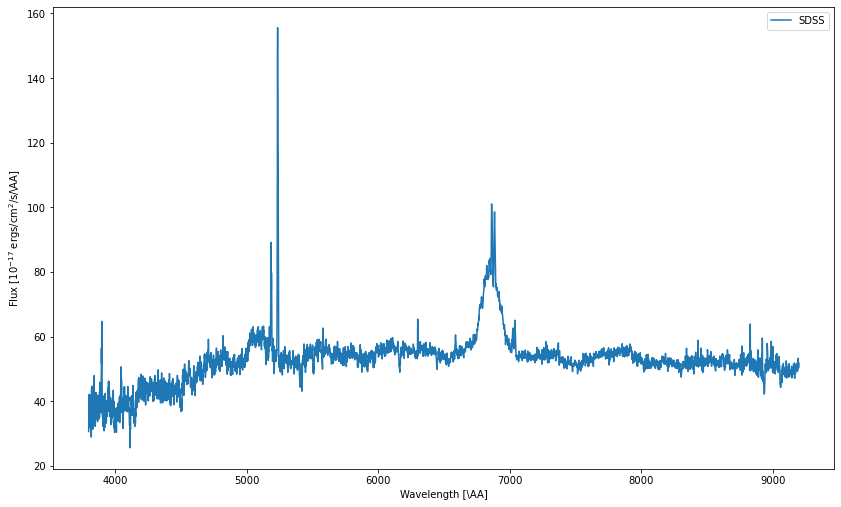

In [11]:
fig, ax = plt.subplots(figsize=(14.,8.5))
for i in np.arange(xid['ra'].size):
    ax.plot(10.**sp[i][1].data['loglam'],sp[i][1].data['flux'],label=xid['instrument'][i])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/\AA]')
ax.set_xlabel('Wavelength [\AA]')
ax.legend(loc='upper right')

### Downloading Images using SDSS

In [12]:
im = SDSS.get_images(matches=xid, band='r')
hdulist = im[0]
hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


(1489, 2048) float32


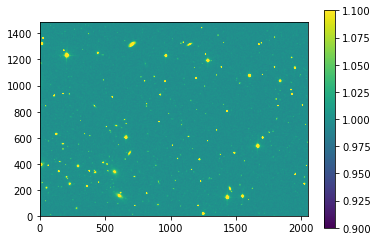

In [13]:
header = hdulist[0].header
data = hdulist[0].data      # image in 1st extension
print (data.shape, data.dtype.name)
#data = hdulist['PRIMARY'].data  
#print (data.shape, data.dtype.name)


plt.imshow(np.sqrt(data+1.),origin='lower', cmap='viridis',vmax=1.1,vmin=0.9)
plt.colorbar();

We have plotted the images in sqrt scale. You will see that the image is not centered. This is because downloading images using `astroquery.sdss` fetches you the entire plate. So, we must focus the images on our coordinate to get the desired cutout. The syntax isn't very important but just have a look at the code. 

In [14]:
c0 = coord.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
wcs = WCS(header)
center = wcs.all_world2pix(c0.ra,c0.dec,0)
size=400
cutout = Cutout2D(data, center, size, wcs=wcs)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


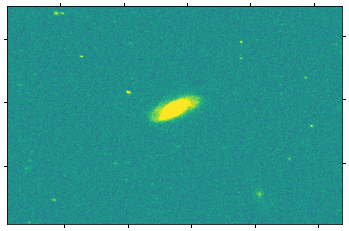

In [15]:
ax = plt.subplot(projection=cutout.wcs)
ra = ax.coords[0]
ra.set_major_formatter('hh:mm:ss') 
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss') 
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(np.sqrt(cutout.data+1.), cmap='viridis', origin='lower',vmax=1.1,vmin=0.9,aspect='auto');


## Voila!